[['33151074 (89.1%)'], ['2193489 (5.9%)'], ['826761 (2.2%)'], ['600979 (1.6%)'], ['441966 (1.2%)']]


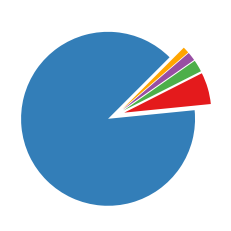

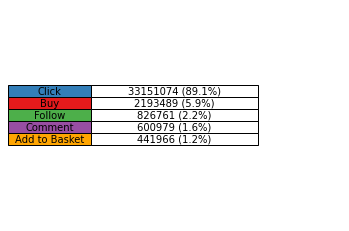

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from util import *
import numpy as np
#mpl.rcParams["font.sans-serif"]=["SimHei"]
#mpl.rcParams["axes.unicode_minus"]=False
df = load_data(("./ddata/merged_DataFrame_fillna.pkl"))
type_to_cnt = df["action_type"].value_counts().to_dict()
y = list(type_to_cnt.values())
x = list(type_to_cnt.keys())
#label = ["Click", "Buy", "Follow", "Comment", " Add to Basket"]
y = list(type_to_cnt.values())
y_rate = y / np.sum(y)
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
color = ["#337eb8", "#e41a1c", "#4daf4a", "#984ea3", "#FFA500"]
plt.pie(y_rate, explode=explode, autopct=None, startangle=45, shadow=False, colors=color)
#plt.title("User Behavior Distribution")
rowLabels = ["Click", "Buy", "Follow", "Comment", "Add to Basket"]
colLabels = ["Action Type"]
percent = [" (89.1%)", " (5.9%)", " (2.2%)", " (1.6%)", " (1.2%)"]
temp = []
for num, perce in zip(y, percent):
    temp.append([str(num) + perce])
print(temp)
rawValues = temp
rowColors = ["#337eb8", "#e41a1c", "#4daf4a", "#984ea3",  "#FFA500"]
plt.show()
table = plt.table(cellText=rawValues, cellLoc="center", colWidths=[0.5],
          rowLabels=rowLabels, rowColours=rowColors, rowLoc="center", loc="center")
plt.rcParams['savefig.dpi'] = 300
plt.axis("off")

plt.show()

In [2]:
action_1 = list(df.loc[df["action_type"] == 1].sort_values("action_time").groupby("month_day").count()["user_log_acct"])
action_2 = list(df.loc[df["action_type"] == 2].sort_values("action_time").groupby("month_day").count()["user_log_acct"])
action_3 = list(df.loc[df["action_type"] == 3].sort_values("action_time").groupby("month_day").count()["user_log_acct"])
action_4 = list(df.loc[df["action_type"] == 4].sort_values("action_time").groupby("month_day").count()["user_log_acct"])
action_5 = list(df.loc[df["action_type"] == 5].sort_values("action_time").groupby("month_day").count()["user_log_acct"])

In [3]:
padding = [0] * (len(action_1) - len(action_5))
action_5 = padding + list(action_5)

In [4]:
import datetime
date1 = '2018-02-01'
date2 = '2018-04-15'
start = datetime.datetime.strptime(date1, '%Y-%m-%d')
end = datetime.datetime.strptime(date2, '%Y-%m-%d')
step = datetime.timedelta(days=1)
dates = []
while start <= end:
    dates.append(start.date())
    start += step

D:\Anac\envs\ml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  import sys
D:\Anac\envs\ml\lib\site-packages\ipykernel_launcher.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  
D:\Anac\envs\ml\lib\site-packages\ipykernel_launcher.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  if __name__ == '__main__':
D:\Anac\envs\ml\lib\site-packages\ipykernel_launcher.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


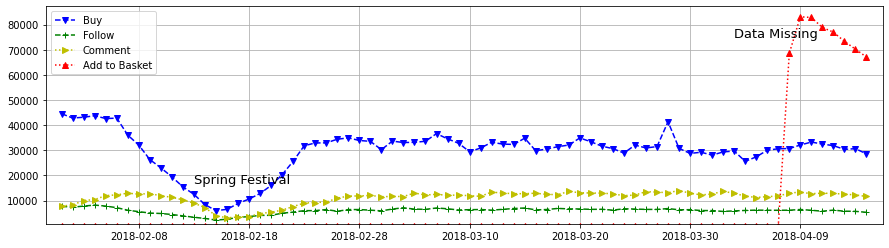

In [5]:
from matplotlib.pyplot import MultipleLocator
import datetime
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.locator_params('y', tight=True,nbins=14)
#ax.plot_date(dates, action_1,linestyle='-', label="Click")
ax.plot_date(dates, action_2,linestyle='dashed', label="Buy", marker='v', color='b')
ax.plot_date(dates, action_3,linestyle='--', label="Follow", marker="+", color='g')
ax.plot_date(dates, action_4,linestyle=':', label="Comment", marker=">",color='y')
ax.plot_date(dates, action_5,linestyle='dotted', label="Add to Basket",marker="^" ,color='r')
ax.legend()
x_major_locator=MultipleLocator(10)
ax.set_ylim(760)
ax.xaxis.set_major_locator(x_major_locator,)
style = dict(size=13, color='black')
ax.text(datetime.datetime(2018, 2, 13),17000, "Spring Festival", **style)
ax.text(datetime.datetime(2018, 4, 3),75000, "Data Missing", **style)
ax.margins(x=0.02)
ax.grid()
plt.savefig('1.jpg', dpi=300, bbox_inches = 'tight')

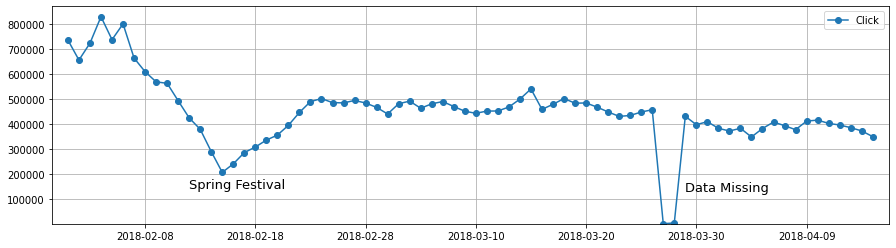

In [6]:
from matplotlib.pyplot import MultipleLocator
import datetime
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.locator_params('y', tight=True,nbins=14)
ax.plot_date(dates, action_1,linestyle='-', label="Click")
ax.legend()
x_major_locator=MultipleLocator(10)
ax.set_ylim(760)
ax.xaxis.set_major_locator(x_major_locator,)
style = dict(size=13, color='black')
ax.text(datetime.datetime(2018, 3, 29),130000, "Data Missing", **style)
ax.text(datetime.datetime(2018, 2, 12),145000, "Spring Festival", **style)
ax.margins(x=0.02)
ax.grid()
plt.savefig('3.jpg', dpi=300, bbox_inches = 'tight')

In [7]:
df = load_data(("./ddata/merged_DataFrame.pkl"))

In [8]:
df_user = df.loc[df["user_log_acct"]].drop_duplicates()
df_item = df.loc[df["item_sku_id"]].drop_duplicates()

In [9]:
df_user["county"].isnull().sum()

1493

In [10]:
age = df_user["sex"] == -1
age.sum() + df_user["sex"].isnull().sum()

5088

In [11]:
df_user.loc[df_user["sex"] == -1]

,user_log_acct,item_sku_id,action_time,action_type,brand_code,shop_id,item_third_cate_cd,vender_id,shop_score,age,sex,user_level,province,city,county,month,day,month_day
1183140,728122,127406,2020-04-12 14:07:00,1,1274.0,5708.0,19.0,330.0,9.694876,NaN,-1.0,4,6.0,88.0,1739.0,4,12,412
1173140,1074000,72767,2020-04-07 23:46:31,1,4371.0,6309.0,24.0,3666.0,0.000000,4.0,-1.0,6,31.0,18.0,864.0,4,7,407
861483,879204,6665,2020-03-20 20:05:59,1,3147.0,9003.0,23.0,2261.0,9.301175,1.0,-1.0,6,26.0,227.0,523.0,3,20,320
138291,23050,9806,2020-02-01 14:15:03,1,2484.0,9649.0,34.0,4138.0,9.651290,5.0,-1.0,6,20.0,211.0,1432.0,2,1,201
1509464,558133,278596,2020-04-15 07:10:37,1,3263.0,3704.0,78.0,6493.0,9.462484,2.0,-1.0,6,26.0,313.0,2528.0,4,15,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598065,277716,110244,2020-03-05 19:41:57,1,2777.0,5523.0,34.0,3666.0,0.000000,6.0,-1.0,6,14.0,259.0,1244.0,3,5,305
241813,1346410,368635,2020-03-12 15:00:25,1,2186.0,4336.0,20.0,9751.0,9.736158,5.0,-1.0,6,8.0,296.0,218.0,3,12,312
1509451,558133,294163,2020-04-04 17:58:35,1,4356.0,5632.0,31.0,4218.0,9.749467,2.0,-1.0,6,26.0,313.0,2528.0,4,4,404
174929,1354478,120161,2020-03-12 13:47:53,1,2777.0,542.0,41.0,8124.0,9.311070,4.0,-1.0,6,20.0,120.0,741.0,3,12,312


In [12]:
user_behavior_cnt = df.groupby("user_log_acct").count().sort_values("item_sku_id")
max_ = max(user_behavior_cnt["item_sku_id"].values)

In [13]:
user_cnt = user_behavior_cnt["item_sku_id"].values
user_cnt = user_cnt.tolist()
user_cnt.sort(reverse=True)
user_cnt = np.array(user_cnt) / len(df)
rank = np.arange(1, len(user_cnt) + 1)

In [14]:
buy_inter = df.loc[df["action_type"] == 2]

In [15]:
user_behavior_buy_cnt = buy_inter.groupby("user_log_acct").count().sort_values("item_sku_id")
max_buy = max(user_behavior_buy_cnt["item_sku_id"].values)
user_cnt_buy = user_behavior_buy_cnt["item_sku_id"].values
user_cnt_buy = user_cnt_buy.tolist()
user_cnt_buy.sort(reverse=True)
user_cnt_buy = np.array(user_cnt_buy) / len(buy_inter)
rank_buy = np.arange(1, len(user_cnt_buy) + 1)

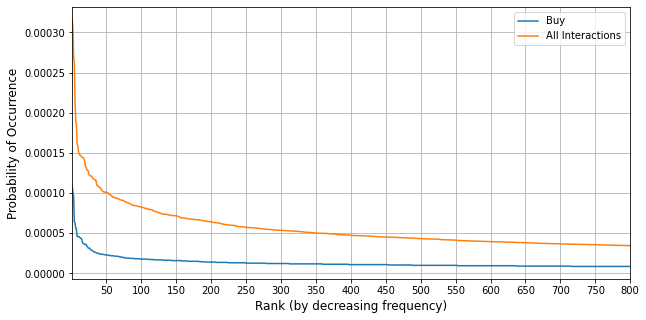

In [16]:
from matplotlib.pyplot import MultipleLocator
import datetime
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.locator_params('y', tight=True,nbins=13)
ax.plot(rank_buy[:800], user_cnt_buy[:800],linestyle='-',label="Buy")
ax.plot(rank[:800], user_cnt[:800],linestyle='-', label="All Interactions")
ax.legend()
x_major_locator=MultipleLocator(50)
#ax.set_ylim(760)
ax.xaxis.set_major_locator(x_major_locator,)
style = dict(size=13, color='black')
ax.margins(x=0)

font1 = {'size'   : 12}
plt.ylabel('Probability of Occurrence', font1)
plt.xlabel('Rank (by decreasing frequency)', font1)
#ax.set(ylabel="Probability of Occurrence", xlabel="Rank (by decreasing frequency)")
ax.grid()
plt.savefig('444.jpg', dpi=300, bbox_inches = 'tight')

In [17]:
frequent = df.groupby("user_log_acct").count().sort_values("item_sku_id")

In [18]:
len(frequent.loc[frequent["sex"] == 1]) / len(frequent)

0.14174240554681491

In [19]:
from util import *
import pandas as pd
import datetime
# 'province', 'county','brand_code', 'shop_id', 'vender_id'
def map_to_id(df, col_name):
    for col in col_name:
        key = sorted(df[col].unique().tolist())
        dict_ = dict(zip(key, range(1, len(key) + 1)))  # 为了给mask留位置 否则0号会被严重影响
        df.loc[:, col] = df[col].map(lambda x: dict_[x])

    num_items = len(sorted(df["item_sku_id"].drop_duplicates(keep='first'))) + 1
    num_cats = len(sorted(df["item_third_cate_cd"].drop_duplicates(keep='first'))) + 1
    num_sex = len(sorted(df["sex"].drop_duplicates(keep='first'))) + 1
    num_ulevel = len(sorted(df["user_level"].drop_duplicates(keep='first'))) + 1
    num_atype = len(sorted(df["action_type"].drop_duplicates(keep='first'))) + 1
    num_city = len(sorted(df["city"].drop_duplicates(keep='first'))) + 1
    
    num_province = len(sorted(df["province"].drop_duplicates(keep='first'))) + 1
    num_county = len(sorted(df["county"].drop_duplicates(keep='first'))) + 1
    num_brand_code = len(sorted(df["brand_code"].drop_duplicates(keep='first'))) + 1
    num_shope = len(sorted(df["shop_id"].drop_duplicates(keep='first'))) + 1
    num_vender = len(sorted(df["vender_id"].drop_duplicates(keep='first'))) + 1

    temp = df[["item_sku_id", "item_third_cate_cd"]].sort_values("item_sku_id").drop_duplicates(subset='item_sku_id',
                                                                                                keep='first')
    cat_list = temp["item_third_cate_cd"].tolist()
    return num_items, num_cats, num_sex, num_ulevel, num_atype, num_city, \
            num_province, num_county, num_brand_code, num_shope,num_vender, cat_list


def _label_trans(x, dic_):
    if x in dic_:
        return 1
    else:
        return 0


def sliding_window_2_basic_form(df, label_start, label_end, inter_start, inter_end, fea_end):
    fea_list = []
    all_data = []
    for i in range(len(label_start)):
        # get times
        lb_st = df.loc[(df['month'] == label_start[i][0]) & (df['day'] == label_start[i][1]), 'month_day'].values[0]
        lb_en = df.loc[(df['month'] == label_end[i][0]) & (df['day'] == label_end[i][1]), 'month_day'].values[0]
        cand_st = df.loc[(df['month'] == inter_start[i][0]) & (df['day'] == inter_start[i][1]), 'month_day'].values[0]
        cand_en = df.loc[(df['month'] == inter_end[i][0]) & (df['day'] == inter_end[i][1]), 'month_day'].values[0]
        fea_position = df.loc[(df['month'] == fea_end[i][0]) & (df['day'] == fea_end[i][1]), 'month_day'].values[0]

        cand_bool = (df['month_day'] >= cand_st) & (df['month_day'] <= cand_en)
        label_bool = (df['month_day'] >= lb_st) & (df['month_day'] <= lb_en) & (df['action_type'] == 2)

        df_inter = df.loc[cand_bool].copy()  # get potential interactions
        df_inter = df_inter[['user_log_acct', 'item_sku_id', 'month_day']].copy()
        df_inter = df_inter.drop_duplicates(subset=['user_log_acct', 'item_sku_id'])
        df_inter = df_inter.loc[(df_inter.item_sku_id.isnull() == False)]  # process

        df_label = df.loc[label_bool].copy()  # get interactions of buying
        label = df_label[['user_log_acct', 'item_sku_id', 'day']].copy()  # process
        # add new columns
        df_inter['label'] = 0
        df_inter['user_item'] = df_inter['user_log_acct'].astype(str) + '_' + df_inter['item_sku_id'].astype(str)
        label['user_item'] = label['user_log_acct'].astype(str) + '_' + label['item_sku_id'].astype(str)

        dic_cnt = label['user_item'].value_counts().to_dict()
        df_inter['label'] = df_inter['user_item'].apply(lambda x: _label_trans(x, dic_cnt)).values
        all_data.append(df_inter)
        fea_list.append(fea_position)

    return all_data, fea_list



In [20]:
label_start = [(3, 27), (3, 27),(3, 27), (3, 27),(3, 27), (3, 27),(3, 27), (3, 27),(3, 27), (3, 27),(3, 27), (3, 27),(3, 27), (3, 27),(3, 27), (3, 27),(3, 27), (3, 27),(3, 27), (3, 27),]
label_end =   [(4, 5), (4, 5),(4, 5), (4, 5),(4, 5), (4, 5),(4, 5), (4, 5),(4, 5), (4, 5),(4, 5), (4, 5),(4, 5), (4, 5),(4, 5), (4, 5),(4, 5), (4, 5),(4, 5), (4, 5),]
inter_start = [(3, 25) ,(3, 24),(3, 23) ,(3, 22),(3, 21) ,(3, 20),(3, 19) ,(3, 18),(3, 17) ,(3, 16),(3, 15) ,(3, 14),(3, 13) ,(3, 12),(3, 11) ,(3, 10),(3, 9),(3, 8),(3, 7) ,(3, 6)]
inter_end =   [(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ]
fea_end = [(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ,(3, 26) ]
all_data, fea_list = sliding_window_2_basic_form(df, label_start, label_end, inter_start, inter_end, fea_end)

In [21]:
num_pos = []
for index in range(20):
    num_pos.append(len(all_data[index].loc[all_data[index]["label"] == 1]))

In [22]:
end = num_pos[1:]
start = num_pos[:-1]
increase = np.array(end) - np.array(start)
x = np.arange(1, 20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


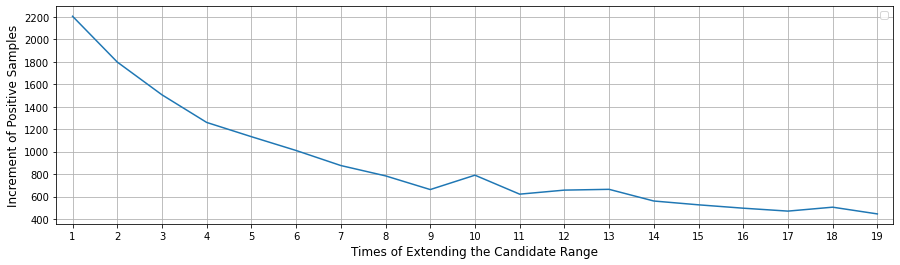

In [23]:
from matplotlib.pyplot import MultipleLocator
import datetime
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.locator_params('y', tight=True,nbins=14)
ax.plot(x, increase,linestyle='-')
ax.legend()
x_major_locator=MultipleLocator(1)
#ax.set_ylim(760)
ax.xaxis.set_major_locator(x_major_locator,)
style = dict(size=13, color='black')
ax.margins(x=0.02)
font1 = {'size'   : 12}
plt.ylabel("Increment of Positive Samples", font1)
plt.xlabel('Times of Extending the Candidate Range', font1)
ax.grid()
plt.savefig('1.jpg', dpi=300, bbox_inches = 'tight')


In [24]:
rate = []
for index in range(20):
    rate.append(len(all_data[index].loc[all_data[index]["label"] == 1]) / len(all_data[index].loc[all_data[index]["label"] != 1]))

In [25]:
x2 = np.arange(1,21)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


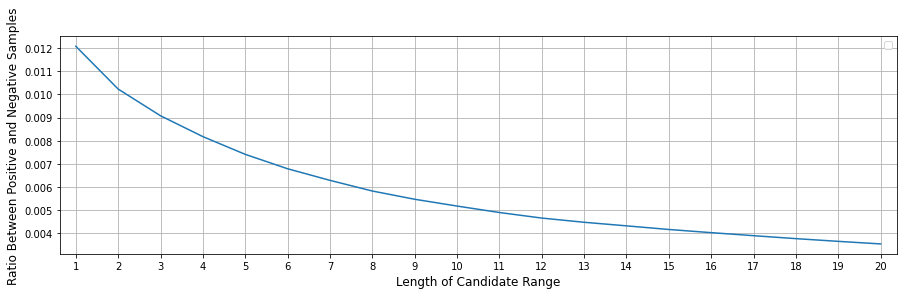

In [26]:
from matplotlib.pyplot import MultipleLocator
import datetime
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.locator_params('y', tight=True,nbins=14)
ax.plot(x2, rate,linestyle='-')
ax.legend()
x_major_locator=MultipleLocator(1)
#ax.set_ylim(760)
ax.xaxis.set_major_locator(x_major_locator,)
style = dict(size=13, color='black')
ax.margins(x=0.02)
font1 = {'size'   : 12}
plt.ylabel("Ratio Between Positive and Negative Samples", font1)
plt.xlabel('Length of Candidate Range', font1)
ax.grid()
plt.savefig('2.jpg', dpi=300, bbox_inches = 'tight')

In [27]:
label_start = [(3, 6), (3, 6),(3, 6), (3, 6),(3, 6), (3, 6),(3, 6), (3, 6),(3, 6), (3, 6),(3, 6), (3, 6),(3, 6), (3, 6),(3, 6), (3, 6),(3, 6), (3, 6),(3, 6), (3, 6)]
label_end =   [(3, 7), (3, 8),(3, 9), (3, 10),(3, 11), (3, 12),(3, 13), (3, 14),(3, 15), (3, 16),(3, 17), (3, 18),(3, 19), (3, 20),(3, 21), (3, 22),(3, 23), (3, 24),(3, 25), (3, 26)]
inter_start = [(3, 1), (3, 1),(3, 1), (3, 1),(3, 1), (3, 1),(3, 1), (3, 1),(3, 1), (3, 1),(3, 1), (3, 1),(3, 1), (3, 1),(3, 1), (3, 1),(3, 1), (3, 1),(3, 1), (3, 1)]
inter_end =   [(3, 5),(3, 5) ,(3, 5),(3, 5) ,(3, 5),(3, 5) ,(3, 5),(3, 5) ,(3, 5),(3, 5) ,(3, 5),(3, 5) ,(3, 5),(3, 5) ,(3, 5),(3, 5) ,(3, 5),(3, 5) ,(3, 5),(3, 5)]
fea_end = [(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),(3,5),]
all_data, fea_list = sliding_window_2_basic_form(df, label_start, label_end, inter_start, inter_end, fea_end)

In [28]:
increase = []
for index in range(20):
    increase.append(len(all_data[index].loc[all_data[index]["label"] == 1]))

In [29]:
end = increase[1:]
start = increase[:-1]

In [30]:
raisee = np.array(end) - np.array(start)
x = np.arange(1, 20)

In [31]:
len(raisee)

19

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


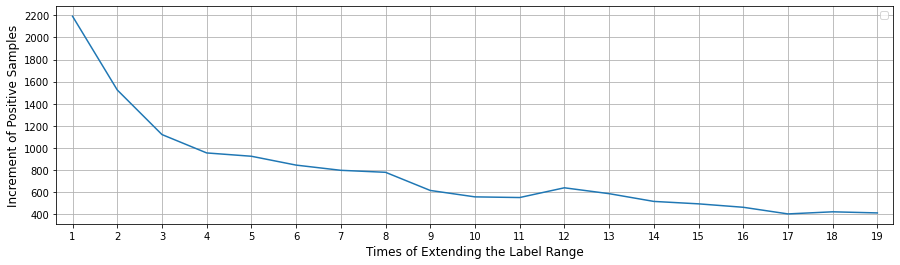

In [32]:
from matplotlib.pyplot import MultipleLocator
import datetime
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.locator_params('y', tight=True,nbins=14)
ax.plot(x, raisee,linestyle='-')
ax.legend()
x_major_locator=MultipleLocator(1)
#ax.set_ylim(760)
ax.xaxis.set_major_locator(x_major_locator,)
style = dict(size=13, color='black')
ax.margins(x=0.02)
font1 = {'size'   : 12}
plt.ylabel("Increment of Positive Samples", font1)
plt.xlabel('Times of Extending the Label Range', font1)
ax.grid()
plt.savefig('2.jpg', dpi=300, bbox_inches = 'tight')

In [33]:
DIN = load_data("./results/learning_curve_din")

In [34]:
din = {}
din[13] = (545136, 0.8868264415640685)
din[11] = (444820, 0.8877592335000748)
din[9] = (345464, 0.8866824432854462)
din[7] = (252808, 0.8866424513450351)
din[5] = (154172, 0.880891960769153)
din[3] = (74352,0.881067126359609 )

In [35]:
DIEN = load_data("./results/learning_curve_dien")
LR = load_data("./results/learning_curve_lr")
base_model = load_data("./results/learning_curve_base")
x1, y1 = [], []
x2, y2 = [], []
for a, b in LR.values():
    x1.append(a)
    y1.append(b)
x1.reverse()
y1.reverse()

x2, y2 = [], []
for a, b in base_model.values():
    x2.append(a)
    y2.append(b)
x2.reverse()
y2.reverse()

x3, y3 = [], []
for a, b in DIEN.values():
    x3.append(a)
    y3.append(b)
x3.reverse()
y3.reverse()

x4, y4 = [], []
for a, b in din.values():
    x4.append(a)
    y4.append(b)
x4.reverse()
y4.reverse()

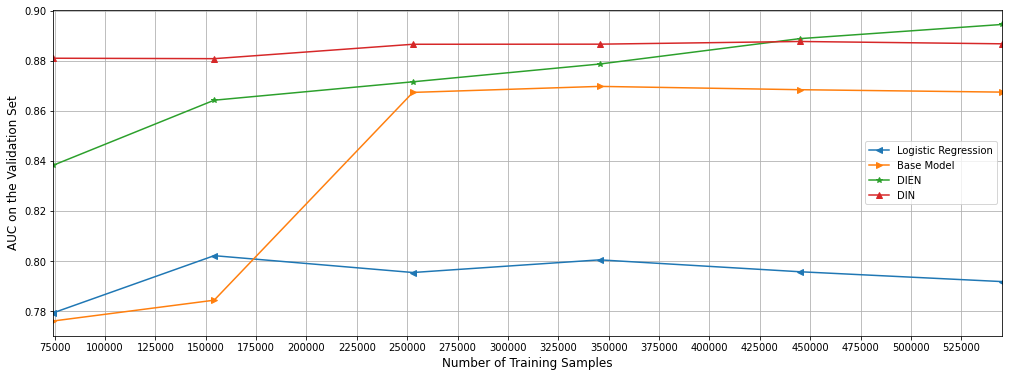

In [36]:
from matplotlib.pyplot import MultipleLocator
import datetime
fig = plt.figure(figsize=(17, 6))
ax = fig.add_subplot(111)
#ax.locator_params('y', tight=True,nbins=13)
ax.plot(x1, y1,linestyle='-',label="Logistic Regression", marker='<')
ax.plot(x2, y2,linestyle='-',label="Base Model", marker='>')
ax.plot(x3, y3,linestyle='-',label="DIEN", marker='*')
ax.plot(x4, y4,linestyle='-',label="DIN", marker='^')
ax.legend()
x_major_locator=MultipleLocator(25000)
#ax.set_ylim(760)
ax.xaxis.set_major_locator(x_major_locator,)
style = dict(size=13, color='black')
ax.margins(x=0)

font1 = {'size'   : 12}
plt.ylabel('AUC on the Validation Set', font1)
plt.xlabel('Number of Training Samples', font1)
#ax.set(ylabel="Probability of Occurrence", xlabel="Rank (by decreasing frequency)")
ax.grid()
plt.savefig('444.jpg', dpi=300, bbox_inches = 'tight')